In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
from datetime import date
from matplotlib.colors import ListedColormap, Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable

%run ../global_variables.py ./
%run ../global_functions.py ./

In [2]:
%matplotlib notebook

In [3]:
list_data_P=[
            'CPC','CRU','GPCC',
            'GPCP','GPM','TRMM','MSWEP','GLDAS20',
            'ERA5_Land','MERRA2','JRA55'
            ]
list_data_ET=['ERA5_Land','MERRA2','JRA55',
              'GLEAM','MOD16','SSEBop','FLUXCOM',
              'GLDAS20_NOAH36','GLDAS20_CLSM25','GLDAS20_VIC412',
              'GLDAS21_NOAH36','GLDAS21_CLSM25','GLDAS21_VIC412',
              'GLDAS22_CLSM25'
              ]
list_data_R=['ERA5_Land','MERRA2','JRA55',
             'GRUN',
             'GLDAS20_NOAH36','GLDAS20_CLSM25',
             'GLDAS20_VIC412',
             'GLDAS21_NOAH36','GLDAS21_CLSM25',
             'GLDAS21_VIC412',
             'GLDAS22_CLSM25',
             ]
list_data_TWS=['GRACE_CSR_mascons','GRACE_JPL_mascons','GRACE_CSR_grid']

list_data={'P':list_data_P,
          'ET':list_data_ET,
          'R':list_data_R,
          'TWS':list_data_TWS}

dict_hydro_var_name={'P':'precipitations',
                    'ET':'evapotranspiration',
                    'R':'runoff',
                    'TWS':'TWS'}

In [4]:
basins=geopandas.read_file("../datasets/basins/basins_with_climate_zones.shp")
basins.set_index("NAME",inplace=True)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.drop([159,22,23],inplace=True) # Antarctica, Greenland,Seven seas (tiny islands Indian ocean)

# 1. Create mean of datasets from the same type

To compare the discrepancy between methods rather than between datasets with the same method.

In [9]:
time_idx=pd.date_range(date(2003,2,1),date(2015,1,1),freq='SM')[::2]
dataset_name='mean'
hydro_var_name='P'
#l_data=['GLDAS20_NOAH36','GLDAS20_CLSM25','GLDAS20_VIC412','GLDAS21_NOAH36','GLDAS21_CLSM25','GLDAS21_VIC412']
#l_data=['ERA5_Land','MERRA2','JRA55']
#l_data=['GPCP','GPM','TRMM'] #,'MSWEP','GLDAS20']
#l_data=['CPC','CRU','GPCC']
#l_data=list_data[hydro_var_name]
l_data=['CPC','GPCC',
            'GPCP','GPM','TRMM','MSWEP','GLDAS20',
            'ERA5_Land','MERRA2','JRA55']
#l_data=['GLEAM','MOD16','SSEBop','FLUXCOM']
df=pd.DataFrame(np.zeros((basins.shape[0],time_idx.shape[0])),index=basins.index,columns=time_idx)
nb_nonan=df.copy()

for data in l_data:
    hydro_month=pd.read_csv('../results/hydrology/{}_{}_monthly.csv'.format(hydro_var_name,data),index_col=[0])
    hydro_selec=hydro_month.loc[:,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_idx]]
    hydro_selec.columns=time_idx
    df+=np.where(np.isnan(hydro_selec),0,hydro_selec)
    nb_nonan+=np.where(np.isnan(hydro_selec),0,1)
df=df/nb_nonan
df.columns=['{}_{} {}'.format(hydro_var_name,dataset_name,d.date()) for d in time_idx]
df.to_csv('../results/hydrology/{}_{}_monthly.csv'.format(hydro_var_name,dataset_name))


df=pd.DataFrame(np.zeros((basins.shape[0],time_idx.shape[0]-2)),index=basins.index,columns=time_idx[1:-1])
nb_nonan=df.copy()
for data in l_data:
    hydro_month=pd.read_csv('../results/hydrology/{}_{}_monthly_filtered.csv'.format(hydro_var_name,data),index_col=[0])
    hydro_selec=hydro_month.loc[:,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_idx[1:-1]]]
    hydro_selec.columns=time_idx[1:-1]
    df+=np.where(np.isnan(hydro_selec),0,hydro_selec)
    nb_nonan+=np.where(np.isnan(hydro_selec),0,1)
df=df/nb_nonan
df.columns=['{}_{} {}'.format(hydro_var_name,dataset_name,d.date()) for d in time_idx[1:-1]]
df.to_csv('../results/hydrology/{}_{}_monthly_filtered.csv'.format(hydro_var_name,dataset_name))

<IPython.core.display.Javascript object>


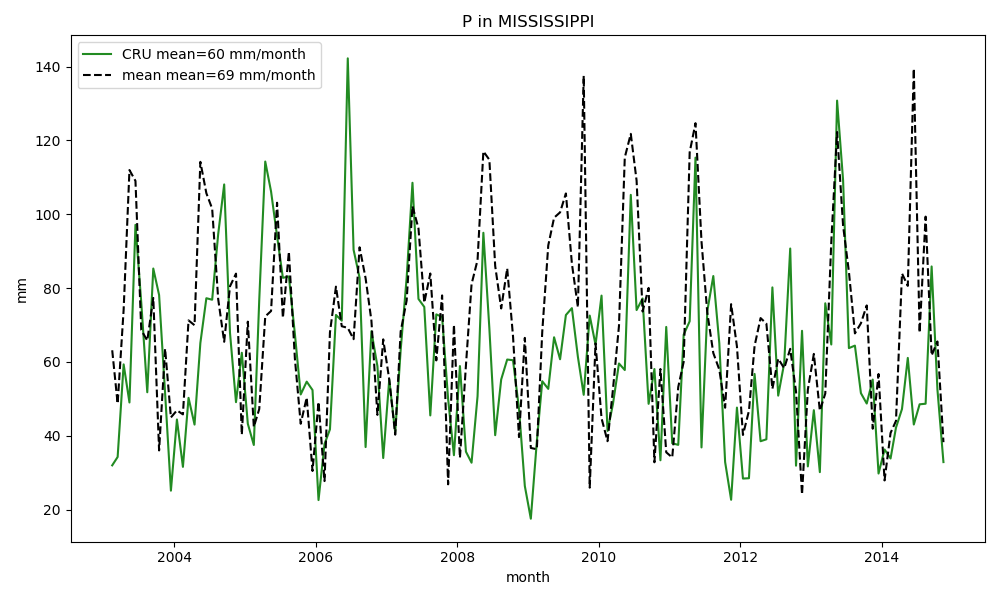

In [15]:
time_idx=pd.date_range(date(2003,2,1),date(2014,12,1),freq='SM')[::2]
dataset_name='mean'
hydro_var_name='P'
l_data=['CRU'] 

basin_id='MISSISSIPPI'

plt.figure(figsize=(10,6))

for data in l_data:
    hydro_month=pd.read_csv('../results/hydrology/{}_{}_monthly.csv'.format(hydro_var_name,data),
                                                            index_col=[0])

    plt.plot(time_idx,hydro_month.loc[basin_id,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_idx]],
             color=colors_dataset[data],
             label='{} mean={:.0f} mm/month'.format(data,
                hydro_month.loc[basin_id,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_idx]].mean()))

# mean over all datasets from the same type
hydro_month=pd.read_csv('../results/hydrology/{}_{}_monthly.csv'.format(hydro_var_name,dataset_name),
                                                        index_col=[0])
plt.plot(time_idx,hydro_month.loc[basin_id,['{}_{} {}'.format(hydro_var_name,dataset_name,d.date()) for d in time_idx]],
         'k--',
         label='{} mean={:.0f} mm/month'.format(dataset_name,
            hydro_month.loc[basin_id,['{}_{} {}'.format(hydro_var_name,dataset_name,d.date()) for d in time_idx]].mean()))
    
plt.legend(loc='upper left')
plt.title("{} in {}".format(hydro_var_name,basin_id))
plt.xlabel('month')
plt.ylabel("mm")
#plt.xlim([date(2002,5,1),date(2017,7,1)])
plt.tight_layout()
plt.show()    

# 2. Plot discrepancy in a given basin

In a given basin, plot all available datasets for one hydrological variable.

In [5]:
def compute_discrepancy(hydro_var_name,basin_id,list_data,coefficient_variation=True):
    time_idx=pd.date_range(date(2003,2,1),date(2014,12,1),freq='SM')[::2]

    df=pd.DataFrame(np.zeros((len(list_data),time_idx.shape[0])),
               index=list_data,
               columns=time_idx)

    len_data=len(list_data)
    for data in list_data:
        hydro_month=pd.read_csv('../results/hydrology/{}_{}_monthly.csv'.format(hydro_var_name,data),index_col=[0])
        hydro_selec=hydro_month.loc[basin_id,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_idx]]

        if np.sum(np.isnan(hydro_selec.values))==0:    
            df.loc[data]=hydro_selec.values
        else:
            len_data-=1
            #print('nans for {}'.format(data))
        
    hydro_mean=df.mean(axis=0)
    if coefficient_variation:
        sigma=np.mean(df.std(axis=0)/hydro_mean)
    else:
        sigma=0.5*np.mean((np.nanmax(df,axis=0)-np.nanmin(df,axis=0))/hydro_mean)
    return sigma

<IPython.core.display.Javascript object>


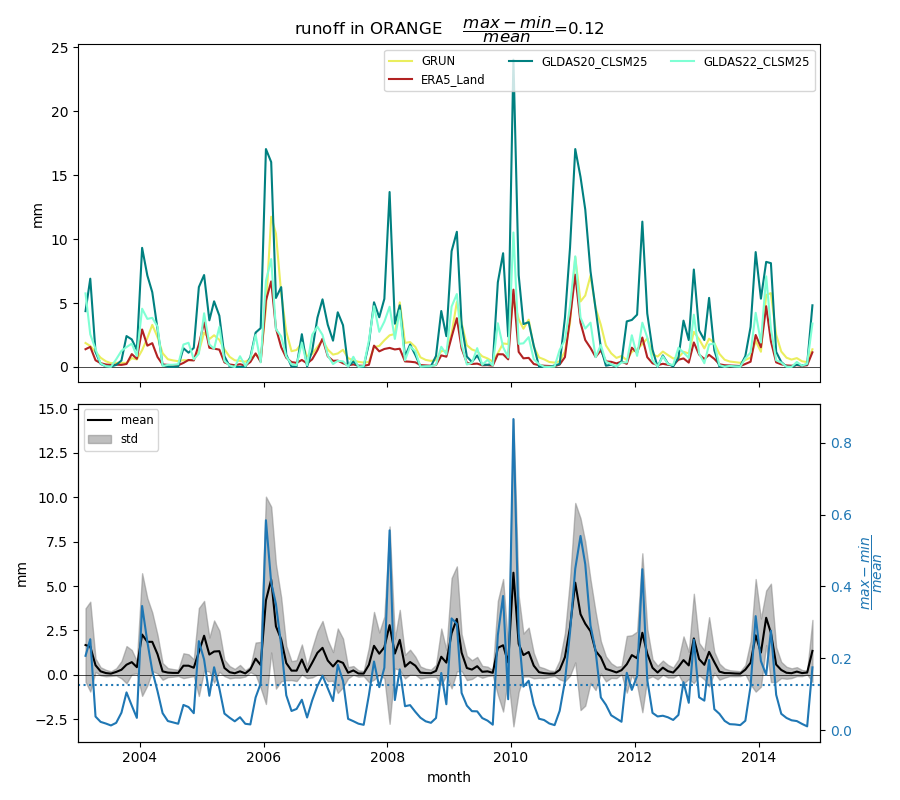

GRUN 1.7854981984121843
ERA5_Land 0.9657522714738824
GLDAS20_CLSM25 3.2165595139537455
GLDAS22_CLSM25 1.651783715098063


<IPython.core.display.Javascript object>


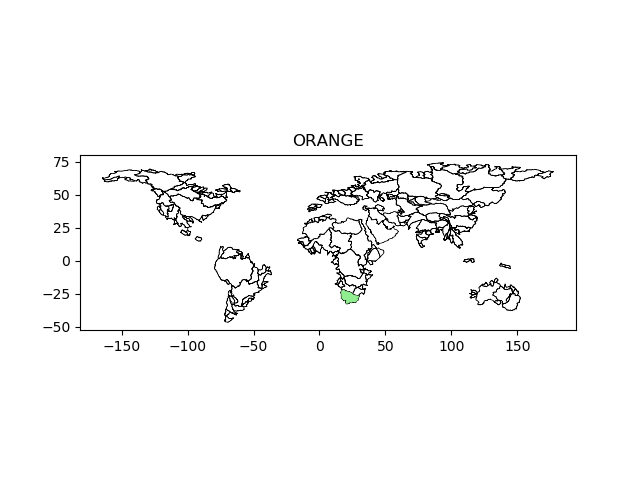

In [16]:
#basin_name=basins.index[np.random.randint(basins.shape[0])]
basin_name='ORANGE'
#basin_name=selected_basins.sort_values(by='discrepancy P',ascending=False).index[1]

coefficient_variation=True
hydro_var_name='R'
hydro_var_long_name=dict_hydro_var_name[hydro_var_name]

time_idx=pd.date_range(date(2003,2,1),date(2014,12,1),freq='SM')[::2]

hydro_mean=np.zeros_like(time_idx,dtype=float)
hydro_max=(-3000)*np.ones_like(time_idx,dtype=float)
hydro_min=3000*np.ones_like(time_idx,dtype=float)
df=pd.DataFrame(np.nan*np.ones((len(list_data[hydro_var_name]),time_idx.shape[0])),
               index=list_data[hydro_var_name],
               columns=time_idx)

#plt.figure(figsize=(9,8))
fig, (ax1, ax2) = plt.subplots(2, 1,sharex=True,figsize=(9,8))
ax1.plot([date(2003,1,1),date(2015,1,1)],[0,0],'k',linewidth=0.5)

len_data=len(list_data[hydro_var_name])
#for i,data in enumerate(list_data[hydro_var_name]):
for i,data in enumerate(['GRUN','ERA5_Land','GLDAS20_CLSM25','GLDAS22_CLSM25']):
    if i>9:
        l_style='--'
    else:
        l_style='-'
    hydro_month=pd.read_csv('../results/hydrology/{}_{}_monthly.csv'.format(hydro_var_name,data),index_col=[0])
    hydro_selec=hydro_month.loc[basin_name,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_idx]]
    print(data,np.mean(hydro_selec))
    
    if np.sum(np.isnan(hydro_selec.values))==0:    
        hydro_mean+=hydro_selec.values
        hydro_max=np.where(hydro_selec.values>hydro_max,hydro_selec.values,hydro_max)
        hydro_min=np.where(hydro_selec.values<hydro_min,hydro_selec.values,hydro_min)
        ax1.plot(time_idx,hydro_selec,l_style,label=data,color=colors_dataset[data])
        
        df.loc[data]=hydro_selec.values
    else:
        len_data-=1
        print('nans for {}'.format(data))
    
#hydro_min=np.where(hydro_min<0,0,hydro_min)
hydro_mean=hydro_mean/len_data
if hydro_var_name=='TWS':
    discr=np.mean((hydro_max-hydro_min)/(np.percentile(hydro_mean,99)-np.percentile(hydro_mean,1)))
else:
    if coefficient_variation:
        discr=np.mean(df.std(axis=0)/np.where(hydro_mean<10,10,hydro_mean))
    else:
        discr=0.5*np.mean((hydro_max-hydro_min)/np.where(hydro_mean<10,10,hydro_mean))


ax1.set_xlim([date(2003,1,1),date(2015,1,1)])    
ax1.legend(ncol=3,fontsize='small')
ax1.set_ylabel('mm')
ax1.set_title(hydro_var_long_name+' in '+str(basin_name)+'    $\dfrac{max - min}{mean}$='+'{:.2f}'.format(discr))

ax2.plot([date(2003,1,1),date(2015,1,1)],[0,0],'k',linewidth=0.5)
if coefficient_variation:
    ax2.fill_between(time_idx,hydro_mean-df.std(axis=0),hydro_mean+df.std(axis=0),
                     color='grey',alpha=0.5,label='std')
else:
    ax2.fill_between(time_idx,hydro_min,hydro_max,color='grey',alpha=0.5,label='min;max range')
ax2.plot(time_idx,hydro_mean,'k',label='mean')
#ax2.plot([date(2003,1,1),date(2015,1,1)],[np.mean(hydro_mean),np.mean(hydro_mean)],'k:',label='mean(mean)')
#plt.plot(time_idx,hydro_max,'r')
#plt.plot(time_idx,hydro_min,'g')
ax2.set_xlim([date(2003,1,1),date(2015,1,1)])
ax2.set_ylabel('mm')
ax2.legend(loc='upper left',fontsize='small')
ax2.set_xlabel('month')

ax3=ax2.twinx()
if hydro_var_name=='TWS':
    ax3.plot(time_idx,(hydro_max-hydro_min)/(np.percentile(hydro_mean,99)-np.percentile(hydro_mean,1)),'tab:blue')
else:
    if coefficient_variation:
        ax3.plot(time_idx,df.std(axis=0)/np.where(hydro_mean<10,10,hydro_mean),'tab:blue')
    else:
        ax3.plot(time_idx,(hydro_max-hydro_min)/np.where(hydro_mean<10,10,hydro_mean),'tab:blue')
ax3.plot([date(2003,1,1),date(2015,1,1)],[discr,discr],'tab:blue',linestyle=':')
ax3.set_ylabel('$\dfrac{max-min}{mean}$',color='tab:blue')
ax3.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.show()



fig, ax = plt.subplots()
ax.set_aspect('equal')
#world.plot(ax=ax, color='white', edgecolor='black')
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins.loc[[basin_name],'geometry'].plot(ax=ax, color='lightgreen')
plt.title(basin_name)
plt.show()
plt.show()

In [22]:
hydro_min=np.nanmin(df,axis=0)
hydro_max=np.nanmax(df,axis=0)

Q1=np.nanpercentile(df,25,axis=0)
Q3=np.nanpercentile(df,75,axis=0)
low_whisker=np.where(Q1-1.5*(Q3-Q1)<hydro_min,hydro_min,Q1-1.5*(Q3-Q1))
high_whisker=np.where(Q3+1.5*(Q3-Q1)>hydro_max,hydro_max,Q3+1.5*(Q3-Q1))

In [28]:
df.loc[np.sum(df>high_whisker,axis=1)>24]

,2003-02-15,2003-03-15,2003-04-15,2003-05-15,2003-06-15,2003-07-15,2003-08-15,2003-09-15,2003-10-15,2003-11-15,...,2014-02-15,2014-03-15,2014-04-15,2014-05-15,2014-06-15,2014-07-15,2014-08-15,2014-09-15,2014-10-15,2014-11-15
ERA5_Land,142.894712,148.723372,75.920414,40.449825,18.180446,16.313323,20.706779,30.200825,46.843834,51.594996,...,121.469156,164.588006,76.687954,53.129895,17.714283,18.059733,26.010604,59.058600,68.014875,52.517104
JRA55,184.949432,165.856205,66.532139,22.686869,8.597949,10.323327,11.607986,22.207768,39.013212,58.689872,...,136.292373,173.200913,92.390396,44.650833,13.761462,11.004642,23.725086,49.640389,73.709400,56.193189


## Map of dispersion

In [16]:
basins=load_basins_data()
selected_basins=basins.copy()

Store the value of $\dfrac{max - min}{mean}$ for each basin and each hydrological variable.

In [17]:
def list_discrepancy_outliers(hydro_var_name,l_data,coefficient_variation=True):
    time_idx=pd.date_range(date(2003,2,1),date(2015,1,1),freq='SM')[::2]

    discrepancy=pd.Series(np.zeros_like(selected_basins.index,dtype=float),index=selected_basins.index)
    outliers=pd.DataFrame(np.zeros((basins.shape[0],len(l_data))),index=basins.index,columns=l_data)
    df=pd.DataFrame(np.nan*np.ones((selected_basins.shape[0],len(l_data)*time_idx.shape[0])),
                    index=selected_basins.index)

    hydro_mean=pd.DataFrame(np.zeros((selected_basins.shape[0],time_idx.shape[0])),
                            index=selected_basins.index,columns=time_idx)
    len_data=len(l_data)*pd.Series(np.ones(selected_basins.index.shape[0]),index=selected_basins.index)

    for i,data in enumerate(l_data):
        hydro_month=pd.read_csv('../results/hydrology/{}_{}_monthly.csv'.format(hydro_var_name,data),index_col=[0])
        hydro_selec=hydro_month.loc[:,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_idx]]
        len_data.loc[np.sum(np.isnan(hydro_month),axis=1)>0]-=1
        hydro_selec=hydro_selec.loc[np.sum(np.isnan(hydro_month),axis=1)==0]    

        hydro_mean.loc[hydro_selec.index,:]+=hydro_selec.values    
        df.loc[hydro_selec.index,i*time_idx.shape[0]:(i+1)*time_idx.shape[0]-1]=hydro_selec.values

    for basin_name in selected_basins.index:
        df_basin=pd.DataFrame(df.loc[basin_name].values.reshape(len(l_data),time_idx.shape[0]),
                         index=l_data,columns=time_idx)
        hydro_min=np.nanmin(df_basin,axis=0)
        hydro_max=np.nanmax(df_basin,axis=0)

        Q1=np.nanpercentile(df_basin,25,axis=0)
        Q3=np.nanpercentile(df_basin,75,axis=0)
        low_whisker=np.where(Q1-1.5*(Q3-Q1)<hydro_min,hydro_min,Q1-1.5*(Q3-Q1))
        high_whisker=np.where(Q3+1.5*(Q3-Q1)>hydro_max,hydro_max,Q3+1.5*(Q3-Q1))

        # report outliers datasets in this basin
        outliers.loc[basin_name,df_basin.loc[np.sum(df_basin>high_whisker,axis=1)>24].index]=1 # datasets above the high whisker
        outliers.loc[basin_name,df_basin.loc[(np.sum(df_basin<low_whisker,axis=1)>24)&(np.sum(df_basin>high_whisker,axis=1)>24)].index]=2 # datasets above the high whisker and below the low whisker
        outliers.loc[basin_name,df_basin.loc[(np.sum(df_basin<low_whisker,axis=1)>24)&(np.sum(df_basin>high_whisker,axis=1)<=24)].index]=-1 # datasets only below the low whisker

        hydro_mean.loc[basin_name]=hydro_mean.loc[basin_name]/len_data.loc[basin_name]

        if hydro_var_name=='TWS':
            discr=np.mean((hydro_max-hydro_min)/(np.percentile(hydro_mean.loc[basin_name],99)-np.percentile(hydro_mean.loc[basin_name],1)))
        else:
            if coefficient_variation:
                discr=np.mean(df_basin.std(axis=0)/np.where(hydro_mean.loc[basin_name]<10,10,hydro_mean.loc[basin_name]))
            else:
                discr=0.5*np.mean((high_whisker-low_whisker)/np.where(hydro_mean.loc[basin_name]<10,10,hydro_mean.loc[basin_name]))

        discrepancy.loc[basin_name]=discr
        
    return discrepancy,outliers

Discrepancy between all datasets

In [18]:
hydro_var_name='P'
coefficient_variation=False
discrepancy,outliers=list_discrepancy_outliers(hydro_var_name,list_data[hydro_var_name],
                                               coefficient_variation=coefficient_variation)
#discrepancy,outliers=list_discrepancy_outliers(hydro_var_name,['GLDAS20_CLSM25','GLDAS21_CLSM25'],coefficient_variation=False)
selected_basins['discrepancy {}'.format(hydro_var_name)]=discrepancy

<IPython.core.display.Javascript object>


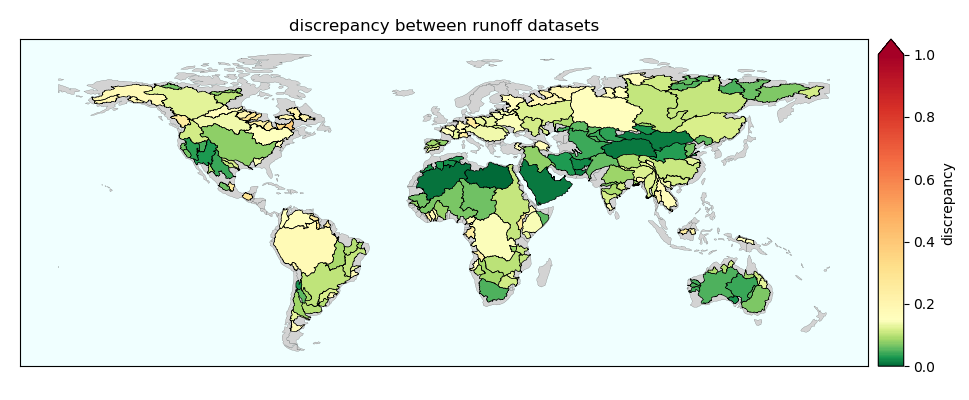

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


In [16]:
from matplotlib.cm import ScalarMappable

hydro_var_name='R'
if hydro_var_name=='P':
    vmax=np.where(coefficient_variation,0.5,0.6)
elif hydro_var_name=='ET':
    vmax=np.where(coefficient_variation,0.7,1)
else:
    vmax=np.where(coefficient_variation,0.8,1)
hydro_var_long_name=dict_hydro_var_name[hydro_var_name]

my_cmap = plt.cm.get_cmap('RdYlGn_r')

fig, ax = plt.subplots(figsize=(9.7,4))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
world.plot(ax=ax,color='lightgrey',edgecolor='black',linewidth=0.1)
selected_basins.plot(ax=ax,column='discrepancy {}'.format(hydro_var_name),
                     legend=True,cax=cax,edgecolor='black',linewidth=0.4,
                     vmin=0,vmax=vmax,
                     norm=MidpointNormalize(vmin=0,vmax=vmax,midpoint=0.15),
                     #vmax=np.percentile(selected_basins['discrepancy {}'.format(hydro_var_name)],98),
                          missing_kwds={"color": "lightgrey",'hatch':'////'},
                          legend_kwds={'label': np.where(coefficient_variation,'coefficient of variation','discrepancy'),
                              'extend':'max'},
                         cmap=my_cmap, 
                    )
#selected_basins.loc[negativeET].boundary.plot(ax=ax,color='black',hatch='++',linewidth=0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('azure')
if coefficient_variation:
    ax.set_title('coefficient of variation between {} datasets'.format(hydro_var_long_name)) 
else:
    ax.set_title('discrepancy between {} datasets'.format(hydro_var_long_name)) 
plt.tight_layout()
plt.show()

In [30]:
selected_basins.sort_values(by='discrepancy R',ascending=True).iloc[:5]

,AREA,CLIMATE,geometry,discrepancy P reanalyses,discrepancy P observations,discrepancy P satellite,discrepancy P all,discrepancy ET reanalyses,discrepancy ET land surface models,discrepancy ET remote sensing,discrepancy ET all,discrepancy R reanalyses,discrepancy R land surface models,discrepancy R all,discrepancy P,discrepancy ET,discrepancy R
HYBAS_ID,,,,,,,,,,,,,,,,,
1030040220,1.119945e+06,16,"POLYGON ((24.06667 26.56250, 24.06631 26.56008...",0.135070,0.096331,0.113901,0.064875,0.111145,0.096349,0.050098,0.100370,0.002901,0.005852,0.021705,0.127776,0.156629,0.013284
1030040250,9.208747e+05,16,"POLYGON ((23.68333 25.34167, 23.68267 25.34910...",0.046195,0.084919,0.062060,0.044129,0.072536,0.061787,0.032337,0.055167,0.000780,0.002974,0.022272,0.077016,0.113507,0.013894
2030085580,5.476000e+05,16,"POLYGON ((43.31667 30.74583, 43.32083 30.74583...",0.300919,0.307479,0.172043,0.119801,0.344767,0.209586,0.366834,0.164943,0.009050,0.028498,0.022355,0.260346,0.319256,0.027602
1030040310,2.436015e+06,16,"POLYGON ((-10.70417 23.62500, -10.71160 23.625...",0.158159,0.197747,0.188549,0.117004,0.123075,0.178630,0.162686,0.136693,0.008250,0.027398,0.029483,0.206769,0.220975,0.029309
2030085510,1.263423e+06,16,"POLYGON ((43.55833 23.94167, 43.56076 23.94202...",0.192215,0.358888,0.189239,0.147316,0.196142,0.150339,0.253504,0.151957,0.003463,0.012031,0.042295,0.265388,0.222103,0.034814


<IPython.core.display.Javascript object>


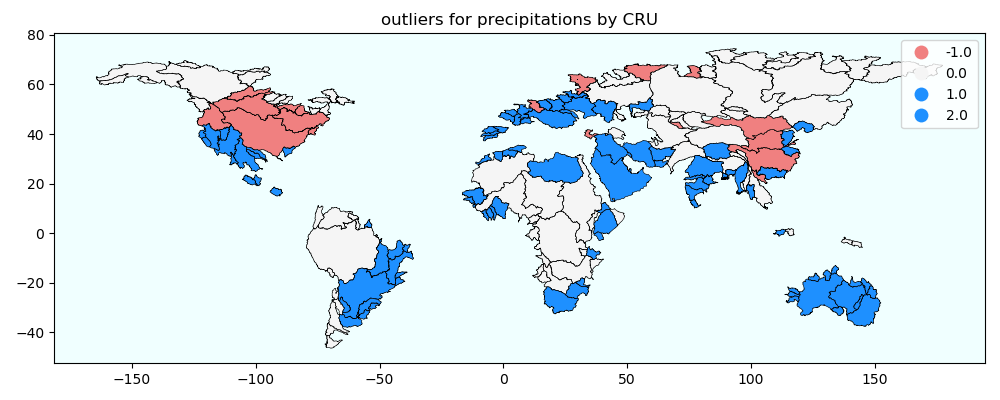

In [30]:
hydro_var_name='P'
data='CRU'
hydro_var_long_name=dict_hydro_var_name[hydro_var_name]
selected_basins['outliers {}'.format(data)]=outliers[data]
selected_basins.sort_values(by='outliers {}'.format(data),inplace=True)

#my_cmap = plt.cm.get_cmap('bwr_r')
my_cmap=ListedColormap(['skyblue','lightcoral','whitesmoke','dodgerblue'])

fig, ax = plt.subplots(figsize=(10,4))
ax.set_aspect('equal')
selected_basins.plot(ax=ax,column='outliers {}'.format(data),
                     vmin=-1,vmax=2,
                     edgecolor='black',linewidth=0.4,
                     legend=True,categorical=True,
                     cmap=my_cmap, 
                    )
ax.set_facecolor('azure')
ax.set_title('outliers for {} by {}'.format(hydro_var_long_name,data)) 
plt.tight_layout()
plt.show()

### Discrepancy between datasets of the same category

In [9]:
hydro_var_name='R'
coefficient_variation=False

dataset_name='reanalyses'
l_data=['ERA5_Land','MERRA2','JRA55']
selected_basins['discrepancy {} {}'.format(hydro_var_name,dataset_name)]=list_discrepancy_outliers(hydro_var_name,
                                                            l_data,coefficient_variation=coefficient_variation)[0]

if hydro_var_name=='P':
    dataset_name='observations'
    l_data=['CPC','CRU','GPCC']
    selected_basins['discrepancy {} {}'.format(hydro_var_name,dataset_name)]=list_discrepancy_outliers(hydro_var_name,
                                                            l_data,coefficient_variation=coefficient_variation)[0]

    dataset_name='satellite'
    l_data=['GPCP','GPM','TRMM'] #'MSWEP','GLDAS20']
    selected_basins['discrepancy {} {}'.format(hydro_var_name,dataset_name)]=list_discrepancy_outliers(hydro_var_name,
                                                            l_data,coefficient_variation=coefficient_variation)[0]

    dataset_name='all'
    l_data=['observations','satellite','reanalyses']
    selected_basins['discrepancy {} {}'.format(hydro_var_name,dataset_name)]=list_discrepancy_outliers(hydro_var_name,
                                                            l_data,coefficient_variation=coefficient_variation)[0]
    
if hydro_var_name=='ET':
    dataset_name='land surface models'
    l_data=['GLDAS20_NOAH36','GLDAS20_CLSM25','GLDAS20_VIC412','GLDAS21_NOAH36','GLDAS21_CLSM25','GLDAS21_VIC412']
    selected_basins['discrepancy {} {}'.format(hydro_var_name,dataset_name)]=list_discrepancy_outliers(hydro_var_name,
                                                            l_data,coefficient_variation=coefficient_variation)[0]

    dataset_name='remote sensing'
    l_data=['GLEAM','MOD16','SSEBop','FLUXCOM']
    selected_basins['discrepancy {} {}'.format(hydro_var_name,dataset_name)]=list_discrepancy_outliers(hydro_var_name,
                                                            l_data,coefficient_variation=coefficient_variation)[0]

    dataset_name='all'
    l_data=['lsm','remote_sensing','reanalyses']
    selected_basins['discrepancy {} {}'.format(hydro_var_name,dataset_name)]=list_discrepancy_outliers(hydro_var_name,
                                                            l_data,coefficient_variation=coefficient_variation)[0]
    
if hydro_var_name=='R':
    dataset_name='land surface models'
    l_data=['GLDAS20_NOAH36','GLDAS20_CLSM25','GLDAS20_VIC412','GLDAS21_NOAH36','GLDAS21_CLSM25','GLDAS21_VIC412']
    selected_basins['discrepancy {} {}'.format(hydro_var_name,dataset_name)]=list_discrepancy_outliers(hydro_var_name,
                                                            l_data,coefficient_variation=coefficient_variation)[0]

    dataset_name='all'
    l_data=['lsm','GRUN','reanalyses']
    selected_basins['discrepancy {} {}'.format(hydro_var_name,dataset_name)]=list_discrepancy_outliers(hydro_var_name,
                                                            l_data,coefficient_variation=coefficient_variation)[0]

<IPython.core.display.Javascript object>


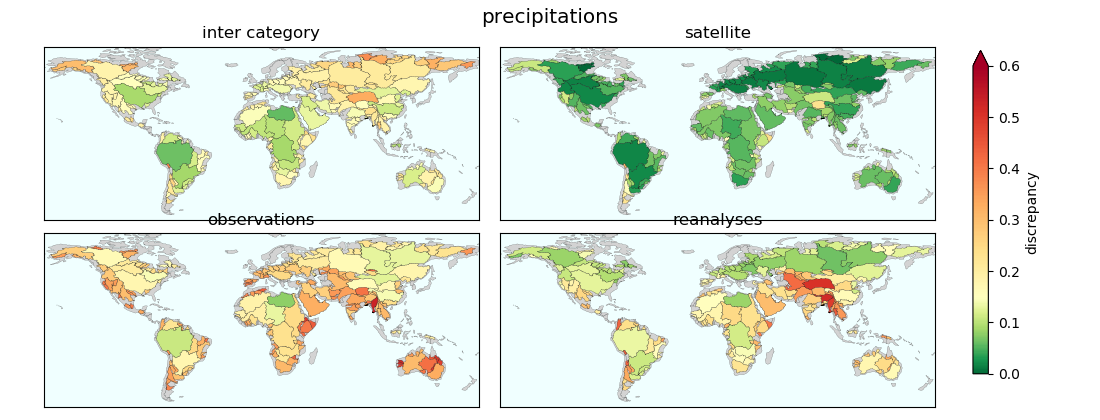

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


In [40]:
hydro_var_name='P'
if hydro_var_name=='P':
    vmax=np.where(coefficient_variation,0.5,0.6)
elif hydro_var_name=='ET':
    vmax=np.where(coefficient_variation,0.7,1)
else:
    vmax=np.where(coefficient_variation,0.8,1)
hydro_var_long_name=dict_hydro_var_name[hydro_var_name]

my_cmap = plt.cm.get_cmap('RdYlGn_r')
my_norm=MidpointNormalize(vmin=0,vmax=vmax,midpoint=0.15)

fig, axs = plt.subplots(2,2, figsize=(11,4.2))
ax1=axs[0,0]
ax2=axs[1,0]
ax3=axs[0,1]
ax4=axs[1,1]

# plot 1
dataset_name='all'
ax1.set_aspect('equal')
world.plot(ax=ax1,color='lightgrey',edgecolor='black',linewidth=0.1)
selected_basins.plot(ax=ax1,column='discrepancy {} {}'.format(hydro_var_name,dataset_name),
                     edgecolor='black',linewidth=0.1,
                     vmin=0,vmax=vmax,
                     norm=my_norm,
                     missing_kwds={"color": "lightgrey",'hatch':'////'},
                     cmap=my_cmap, 
                    )
ax1.set_facecolor('azure')
ax1.set_title('inter category')
ax1.set_xlim([-170,180])
ax1.set_ylim([-60,80])
ax1.set_xticks([])
ax1.set_yticks([])

# plot 2
if hydro_var_name=='P':
    dataset_name='observations'
else:
    dataset_name='land surface models'
ax2.set_aspect('equal')
world.plot(ax=ax2,color='lightgrey',edgecolor='black',linewidth=0.1)
selected_basins.plot(ax=ax2,column='discrepancy {} {}'.format(hydro_var_name,dataset_name),
                     edgecolor='black',linewidth=0.1,
                     vmin=0,vmax=vmax,
                     norm=my_norm,
                     missing_kwds={"color": "lightgrey",'hatch':'////'},
                     cmap=my_cmap, 
                    )
ax2.set_facecolor('azure')
ax2.set_title(dataset_name)
ax2.set_xlim([-170,180])
ax2.set_ylim([-60,80])
ax2.set_xticks([])
ax2.set_yticks([])

# plot 3

if hydro_var_name=='P':
    dataset_name='satellite'
    ax3.set_aspect('equal')
    world.plot(ax=ax3,color='lightgrey',edgecolor='black',linewidth=0.1)
    selected_basins.plot(ax=ax3,column='discrepancy {} {}'.format(hydro_var_name,dataset_name),
                         edgecolor='black',linewidth=0.1,
                         vmin=0,vmax=vmax,
                         norm=my_norm,
                         missing_kwds={"color": "lightgrey",'hatch':'////'},
                         cmap=my_cmap, 
                        )
    ax3.set_facecolor('azure')
    ax3.set_title(dataset_name)
    ax3.set_xlim([-170,180])
    ax3.set_ylim([-60,80])
    ax3.set_xticks([])
    ax3.set_yticks([])

elif hydro_var_name=='ET':
    dataset_name='remote sensing'
    ax3.set_aspect('equal')
    world.plot(ax=ax3,color='lightgrey',edgecolor='black',linewidth=0.1)
    selected_basins.plot(ax=ax3,column='discrepancy {} {}'.format(hydro_var_name,dataset_name),
                         edgecolor='black',linewidth=0.1,
                         vmin=0,vmax=vmax,
                         norm=my_norm,
                         missing_kwds={"color": "lightgrey",'hatch':'////'},
                         cmap=my_cmap, 
                        )
    ax3.set_facecolor('azure')
    ax3.set_title(dataset_name)
    ax3.set_xlim([-170,180])
    ax3.set_ylim([-60,80])
    ax3.set_xticks([])
    ax3.set_yticks([])
else:
    ax3.set_axis_off()

# plot 4
dataset_name='reanalyses'
world.plot(ax=ax4,color='lightgrey',edgecolor='black',linewidth=0.1)
selected_basins.plot(ax=ax4,column='discrepancy {} {}'.format(hydro_var_name,dataset_name),
                     edgecolor='black',linewidth=0.1,
                     vmin=0,vmax=vmax,
                     norm=my_norm,
                     missing_kwds={"color": "lightgrey",'hatch':'////'},
                     cmap=my_cmap, 
                    )
ax4.set_facecolor('azure')
ax4.set_title(dataset_name)
ax4.set_xlim([-170,180])
ax4.set_ylim([-60,80])
ax4.set_xticks([])
ax4.set_yticks([])

fig.colorbar(ScalarMappable(norm=my_norm,cmap=my_cmap), ax=axs, 
             orientation='vertical', 
             fraction=.02, # right space
             extend='max',
             label=np.where(coefficient_variation,'coefficient of variation','discrepancy')
            )
fig.suptitle(hydro_var_long_name,fontsize='x-large')
plt.subplots_adjust(left=0.04,right=0.85,bottom=0.02,top=0.9,wspace=0.05,hspace=0.02)
plt.show()

In [26]:
hydro_var_name='ET'
cat='remote sensing' # observations, satellite, remote sensing, reanalyses, land surface models
selected_basins.loc[selected_basins['discrepancy {} {}'.format(hydro_var_name,cat)]<=0.15,
                    'discrepancy {} {}'.format(hydro_var_name,cat)].sort_values()

HYBAS_ID
7030034520    0.000000
1030040250    0.022866
1030040220    0.035425
4030018350    0.062819
1030034260    0.076921
6030004480    0.078631
1030040260    0.081304
1030020050    0.086231
5030000010    0.087274
5030015660    0.089164
4030011690    0.091765
6030004470    0.091887
6030007010    0.092752
6030007000    0.093743
4030015090    0.107172
4030024190    0.109265
1030040310    0.115036
1030040210    0.115351
7030049280    0.121974
6030000750    0.122041
4030017020    0.124817
6030007960    0.126220
8030009570    0.127979
6030000010    0.128653
3030005240    0.130424
8030010700    0.131834
5030040360    0.131929
1030023310    0.133343
4030009890    0.133592
7030042040    0.139374
4030007850    0.139547
1030040280    0.147322
4030050410    0.147486
Name: discrepancy ET remote sensing, dtype: float64

In [29]:
selected_basins.drop(['AREA','CLIMATE','geometry'],axis=1).to_csv('../results/discrepancy.csv')

In [84]:
#minCLSM22=hydro_min.min(axis=1)

In [203]:
#negativeET=[1030000010, 1030040220, 1030040250, 1030040310, 2030030090, 2030033480, 2030041390, 3030004740, 3030009130,
#            4030000010, 6030021870, 6030026140, 7030008720, 7030014940, 7030021430, 7030022250, 7030024600, 7030029460,
#            7030033480, 8030005510, 8030009560]

Warning : very small values in basins with few datasets available

Show the basins with the highest disagreement between datasets

In [15]:
selected_basins.drop(to_remove).sort_values(by='discrepancy P',ascending=False).iloc[:20]

,AREA,CLIMATE,geometry,discrepancy P
HYBAS_ID,,,,
2030078740,5.501929e+05,16,"POLYGON ((42.69583 15.31250, 42.71046 15.31316...",1.455243
1030040210,1.342537e+06,16,"POLYGON ((9.10417 18.34167, 9.10328 18.34512, ...",1.418978
1030040250,9.208747e+05,16,"POLYGON ((23.68333 25.34167, 23.68267 25.34910...",1.399041
2030085580,5.476000e+05,16,"POLYGON ((43.31667 30.74583, 43.32083 30.74583...",1.304178
1030040220,1.119945e+06,16,"POLYGON ((24.06667 26.56250, 24.06631 26.56008...",1.303736
4030050210,1.093225e+06,8,"POLYGON ((74.90833 38.03333, 74.89258 38.03273...",1.220840
6030029280,2.911360e+05,8,"POLYGON ((-79.28333 -4.47500, -79.28992 -4.475...",1.169421
2030085510,1.263423e+06,16,"POLYGON ((43.55833 23.94167, 43.56076 23.94202...",1.153434
6030032290,2.073024e+05,13,"POLYGON ((-78.27500 9.20833, -78.26862 9.20777...",1.054414


In [59]:
selected_basins['discrepancy R all'].quantile(0.75)

0.31422189639799053

# Relative bias to the category mean

In [7]:
dict_category={'CPC':'obs','CRU':'obs','GPCC':'obs',
               'GPCP':'satellite','GPM':'satellite','GLDAS20':'satellite','MSWEP':'satellite','TRMM':'satellite',
               'ERA5_Land':'reanalysis','JRA55':'reanalysis','MERRA2':'reanalysis',
               'GLDAS20_CLSM25':'lsm','GLDAS21_CLSM25':'lsm','GLDAS22_CLSM25':'lsm',
               'GLDAS20_NOAH36':'lsm','GLDAS21_NOAH36':'lsm',
               'GLDAS20_VIC412':'lsm','GLDAS21_VIC412':'lsm',
               'GLEAM':'remote_sensing','MOD16':'remote_sensing','SSEBop':'remote_sensing','FLUXCOM':'remote_sensing',   
}

In [14]:
time_idx=pd.date_range(date(2003,3,1),date(2014,12,1),freq='SM')[::2]

hydro_var_name='R'
rel_bias=pd.DataFrame(np.zeros((basins.shape[0],len(list_data[hydro_var_name]))),
                index=basins.index,columns=list_data[hydro_var_name])

#for category in ['obs','satellite','reanalysis']: # if we take the category mean as a reference. otherwise, it is the mean over all datasets
    #for data in [d for d,cat in dict_category.items() if cat == category]:
for data in list_data[hydro_var_name]:
    hydro_month=pd.read_csv('../results/hydrology/{}_{}_monthly.csv'.format(hydro_var_name,data),index_col=[0])
    hydro_selec=hydro_month.loc[:,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_idx]]
    hydro_selec.columns=time_idx

    if hydro_var_name=='R':
        #category='GRUN'
        category='mean'
    else:
        category='mean' # if we want to compare to the mean over all datasets instead of the category mean
    hydro_month=pd.read_csv('../results/hydrology/{}_{}_monthly.csv'.format(hydro_var_name,category),index_col=[0])
    hydro_selec_cat=hydro_month.loc[:,['{}_{} {}'.format(hydro_var_name,category,d.date()) for d in time_idx]]
    hydro_selec_cat.columns=time_idx

    rel_bias[data]=np.mean(hydro_selec-hydro_selec_cat,axis=1)/np.mean(hydro_selec_cat,axis=1)
#rel_bias.to_csv('../results/relative_bias_{}.csv'.format(hydro_var_name))
rel_bias

,ERA5_Land,MERRA2,JRA55,GRUN,GLDAS20_NOAH36,GLDAS20_CLSM25,GLDAS20_VIC412,GLDAS21_NOAH36,GLDAS21_CLSM25,GLDAS21_VIC412,GLDAS22_CLSM25
HYBAS_ID,,,,,,,,,,,
1030003990,-0.725830,-0.230464,-0.382619,0.716943,-0.495496,-0.174962,0.526011,-0.005320,-0.045943,1.412894,-0.595213
1030008100,0.143774,-0.394113,-0.741473,0.287653,-0.203487,0.102602,1.591595,-0.605948,-0.332047,0.686648,-0.535204
1030008110,-0.421423,-0.433352,-0.721875,0.178310,0.234815,-0.459946,1.179665,0.355357,-0.489839,1.192426,-0.614137
1030011660,0.114893,-0.518945,-0.077696,-0.120471,0.029105,-0.401025,0.992878,0.109155,-0.579357,1.025780,-0.574316
1030011670,-0.560980,-0.444564,-0.182748,0.176987,-0.041033,0.016890,1.393553,-0.279897,-0.341402,0.530077,-0.266884
...,...,...,...,...,...,...,...,...,...,...,...
8030005520,0.694117,0.427970,0.722939,0.462132,-0.551743,-0.813271,-0.124912,0.007721,-0.645925,0.591726,-0.770754
8030009560,0.339089,-0.051159,0.170287,0.243746,-0.356431,-0.582773,0.647515,-0.227159,-0.638758,0.622592,-0.166949
8030009570,0.271035,0.297247,0.626718,1.355295,-0.604955,-0.750217,0.473266,-0.406878,-0.780100,0.289279,-0.770691


In [14]:
# refine the definition of outliers in terms of spread larger than the standard deviation?
outliers=list_discrepancy_outliers(hydro_var_name,list_data[hydro_var_name])[1]
outliers

,CPC,CRU,GPCC,GPCP,GPM,TRMM,MSWEP,GLDAS20,ERA5_Land,MERRA2,JRA55
HYBAS_ID,,,,,,,,,,,
1030003990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030008100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030008110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030011660,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030011670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8030005520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8030009560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8030009570,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


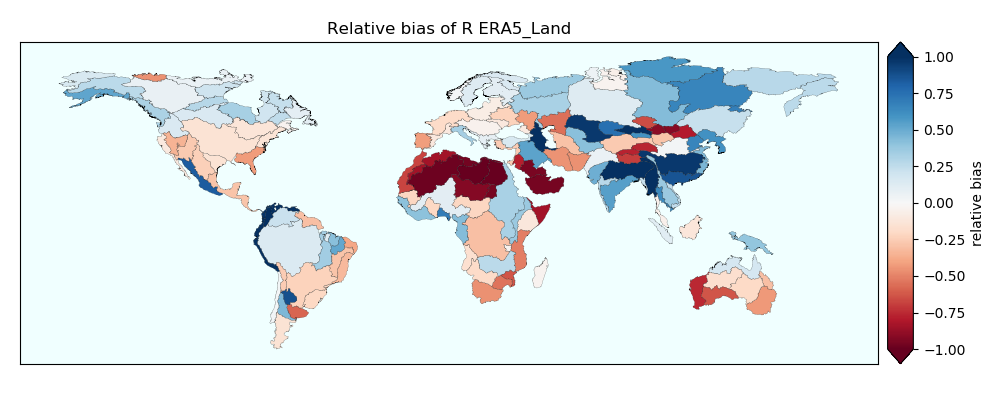

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<IPython.core.display.Javascript object>


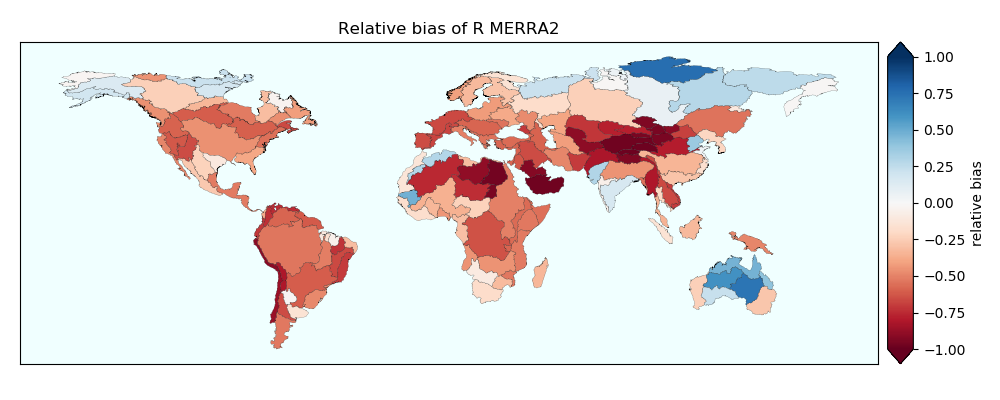

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<IPython.core.display.Javascript object>


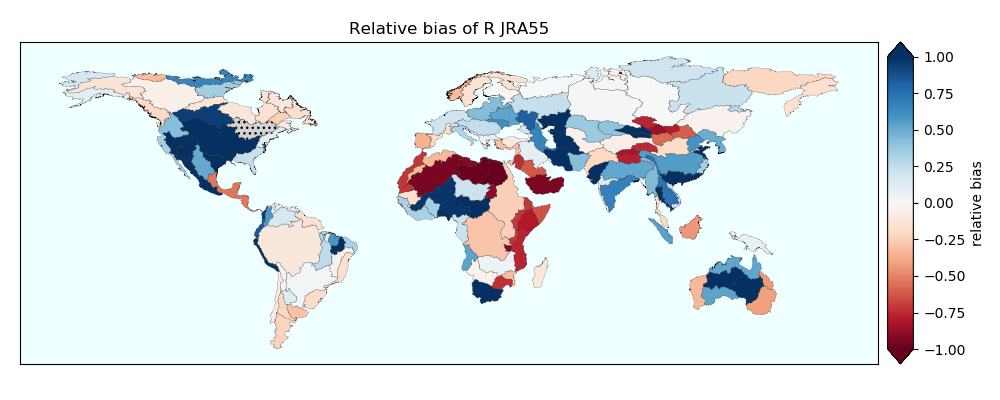

<IPython.core.display.Javascript object>


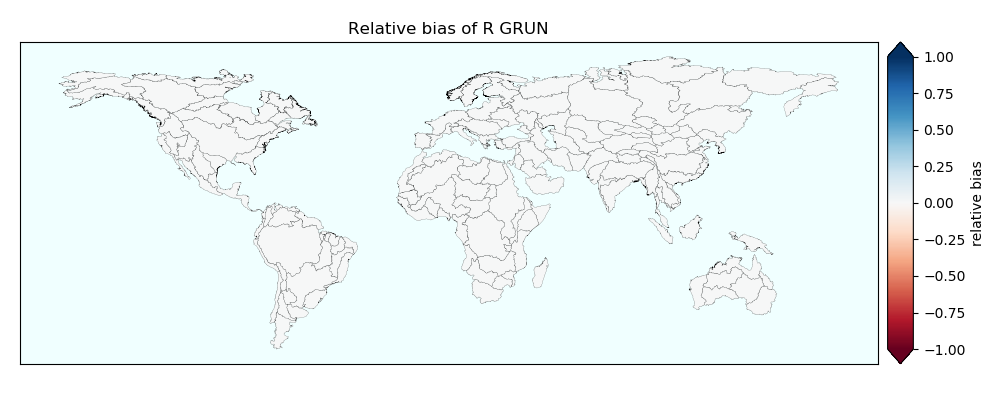

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<IPython.core.display.Javascript object>


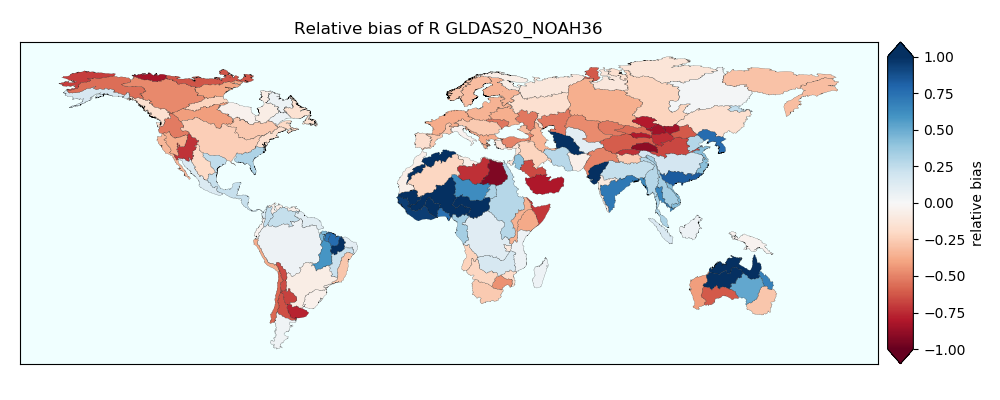

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<IPython.core.display.Javascript object>


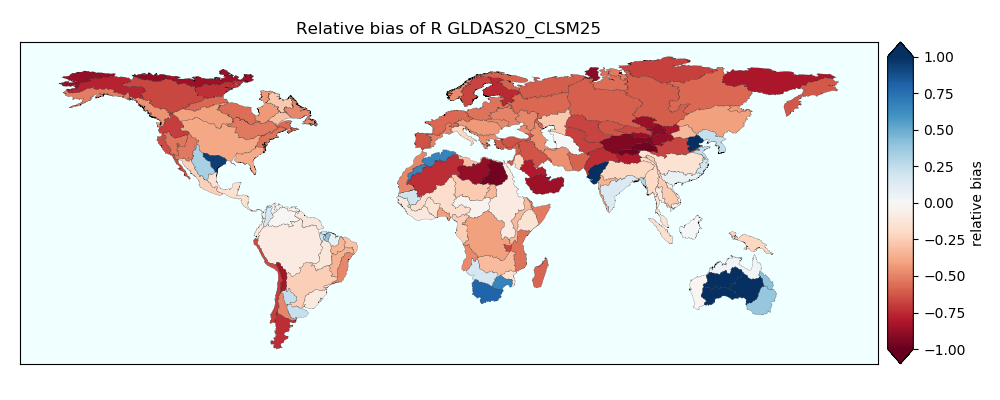

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<IPython.core.display.Javascript object>


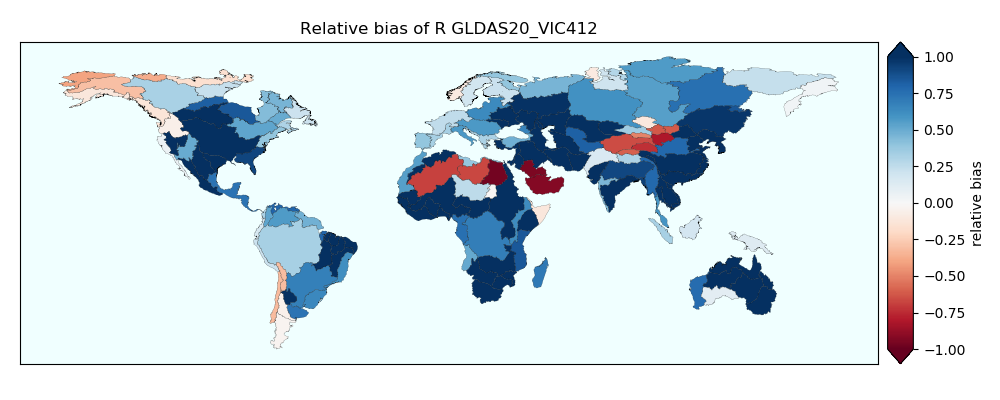

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<IPython.core.display.Javascript object>


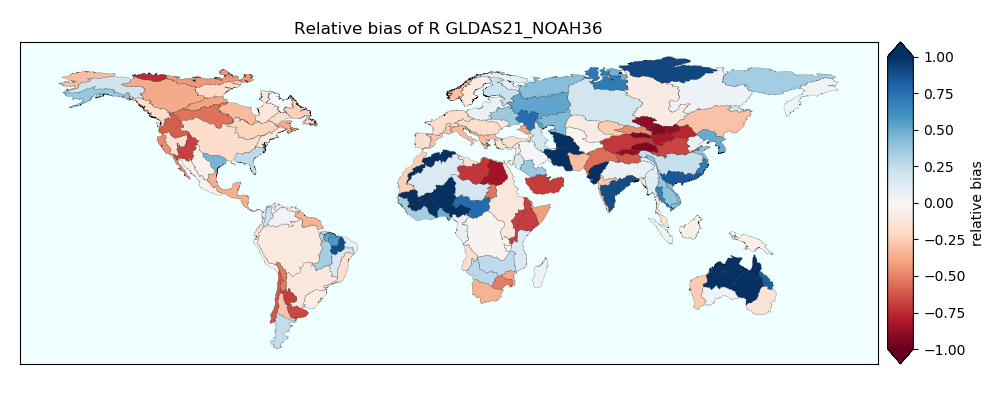

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<IPython.core.display.Javascript object>


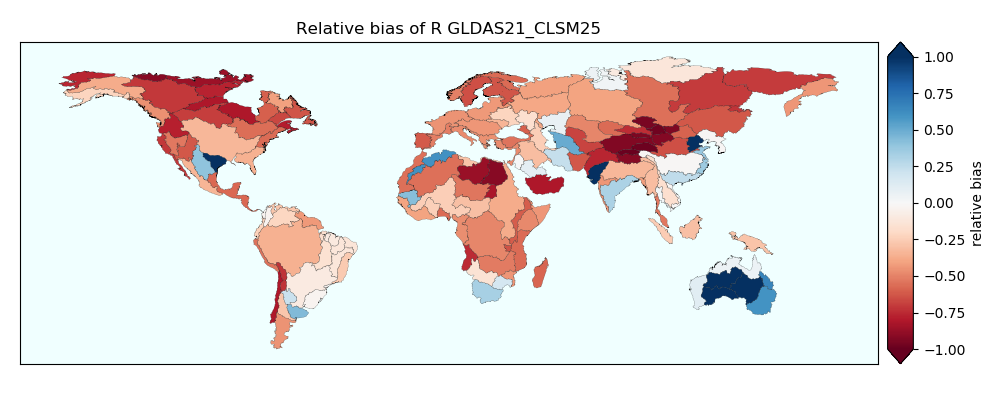

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<IPython.core.display.Javascript object>


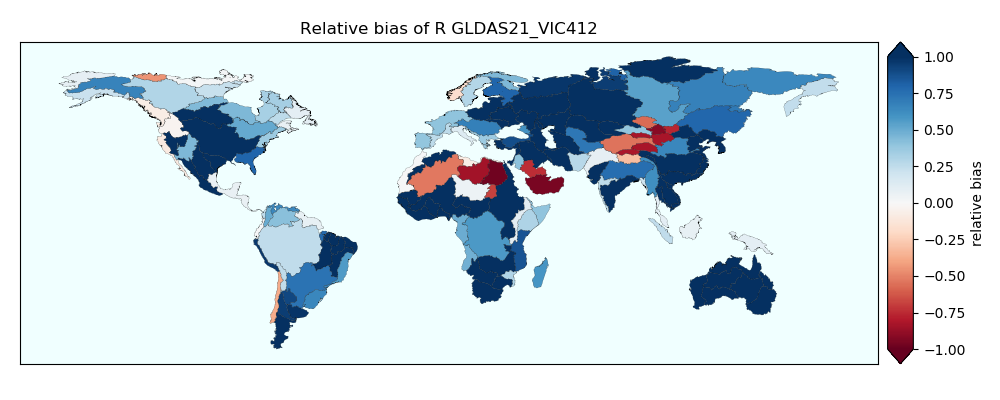

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<IPython.core.display.Javascript object>


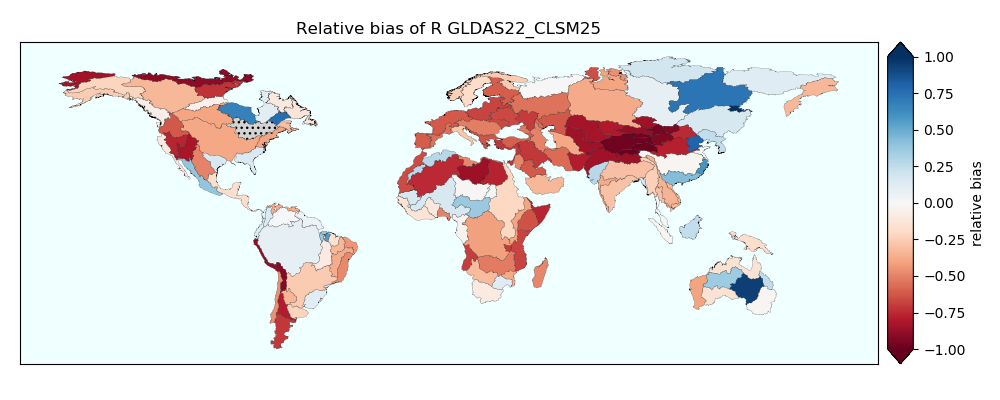

In [55]:
for data in list_data[hydro_var_name]:
    if hydro_var_name=='P':
        vmax=0.3
    elif hydro_var_name=='ET':
        vmax=0.6
    else:
        vmax=1

    basins_plot=basins.copy()
    basins_plot['relative bias {}'.format(data)]=rel_bias[data]

    my_cmap = plt.cm.get_cmap('RdBu')

    fig, ax = plt.subplots(figsize=(10,4))
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)
    basins_plot.plot(ax=ax,column='relative bias {}'.format(data),
                     legend=True,cax=cax,edgecolor='black',linewidth=0.1,
                     vmin=-vmax,vmax=vmax,
                     missing_kwds={"color": "lightgrey",
                                   'hatch':'...'
                                  },
                     legend_kwds={'label': 'relative bias',
                                  'extend':'both'},
                     cmap=my_cmap, 
                        )
    #basins_plot.loc[outliers[data]==2].boundary.plot(ax=ax,edgecolor='white',hatch='////',linewidth=0.5)
    #basins_plot.loc[outliers[data]==1].boundary.plot(ax=ax,edgecolor='cyan',hatch='////',linewidth=0.5)
    #basins_plot.loc[outliers[data]==-1].boundary.plot(ax=ax,edgecolor='red',hatch='////',linewidth=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('azure')
    ax.set_title('Relative bias of {} {}'.format(hydro_var_name,data)) 
    plt.tight_layout()
    if category=='GRUN':
        plt.savefig('../../project_outline/article_plots/relative_bias/{}_{}_refGRUN.png'.format(hydro_var_name,data))
    else:
        plt.savefig('../../project_outline/article_plots/relative_bias/{}_{}.png'.format(hydro_var_name,data))
    plt.show()

## Correlation between GRUN and VIC

In [52]:
hydro_var_name='R'
data='GLDAS21_CLSM25'
hydro_month=pd.read_csv('../results/hydrology/{}_GRUN_monthly.csv'.format(hydro_var_name),index_col=[0])
R_GRUN=hydro_month.loc[:,['{}_GRUN {}'.format(hydro_var_name,d.date()) for d in time_idx]]
R_GRUN.columns=time_idx

hydro_month=pd.read_csv('../results/hydrology/{}_{}_monthly.csv'.format(hydro_var_name,data),index_col=[0])
hydro_selec=hydro_month.loc[:,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_idx]]
hydro_selec.columns=time_idx

In [50]:
R_GRUN.corrwith(hydro_selec,axis=1)

HYBAS_ID
1030003990    0.201768
1030008100    0.426190
1030008110    0.946210
1030011660    0.958871
1030011670    0.891335
                ...   
8030005520    0.622727
8030009560    0.917158
8030009570    0.525607
8030010700    0.845735
8030016860    0.689913
Length: 162, dtype: float64

<IPython.core.display.Javascript object>


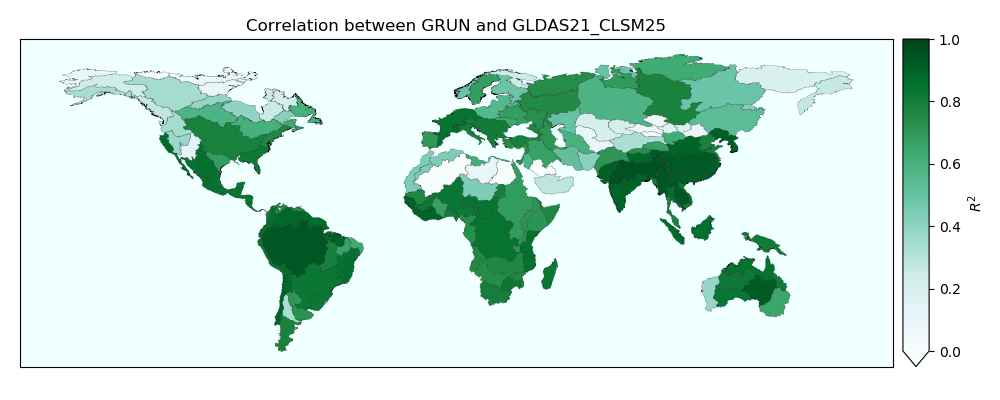

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


In [53]:
basins_plot=basins.copy()
basins_plot['correlation GRUN-{}'.format(data)]=R_GRUN.corrwith(hydro_selec,axis=1)

my_cmap = plt.cm.get_cmap('RdBu')

fig, ax = plt.subplots(figsize=(10,4))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
basins_plot.plot(ax=ax,column='correlation GRUN-{}'.format(data),
                 legend=True,cax=cax,edgecolor='black',linewidth=0.1,
                 vmin=0,vmax=1,
                 missing_kwds={"color": "lightgrey",
                               'hatch':'...'
                              },
                 legend_kwds={'label': '$R^2$',
                             'extend':'min'},
                 cmap='BuGn', 
                    )
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('azure')
ax.set_title('Correlation between GRUN and {}'.format(data)) 
plt.tight_layout()
plt.show()